# Chapter VI Models

In [1]:
#%pylab inline

import networkx as nx
import random

### Generating Random Networks (Erdos-Renyi)

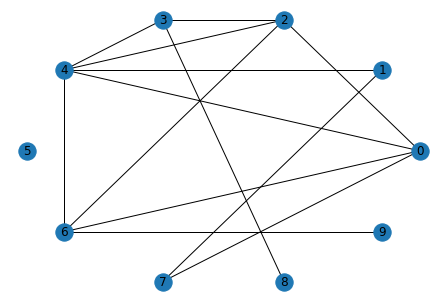

In [3]:
number_of_nodes=10
p=0.4

G=nx.Graph()
for n in range(number_of_nodes): 
    G.add_node(n)

node_list=G.nodes()

#generate the graph adding ad edge for each possible couple of nodes with probability p
for i1 in range(len(node_list)-1):
    for i2 in range(i1+1,len(node_list)):
        
        if random.random()<p:
            G.add_edge(i1,i2)

pos=nx.circular_layout(G)   
nx.draw(G, pos,with_labels=True)

# Plot histogram
# hist(degree_sequence,bins=15)

### Randomizing Graphs
The following code swaps some edges. The result is a different graph with the same parameters.

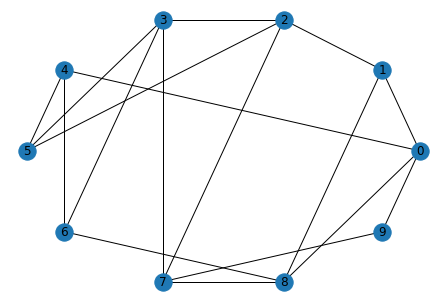

In [36]:
number_of_swaps=2

while number_of_swaps>0:
    #pick at random a couple of edges and verify 
    #they don't share nodes
    edges_to_swap=random.sample(G.edges(),2)
    e0=edges_to_swap[0]
    e1=edges_to_swap[1]

    if len(set([e0[0],e0[1],e1[0],e1[1]]))<4: continue

    #check if the edge already exists and eventually add it
    if not G.has_edge(e0[0],e1[1]):
        G.add_edge(e0[0],e1[1])
    G.remove_edge(e0[0], e0[1])
    if not G.has_edge(e0[1],e1[0]):
        G.add_edge(e0[1],e1[0])
    G.remove_edge(e1[0], e1[1])

    number_of_swaps-=1

pos=nx.circular_layout(G)   
nx.draw(G, pos,with_labels=True)